# Exploratory Analysis on Text Data

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

%matplotlib inline

In [80]:
df = pd.read_csv('Data/Bag of words/bow_filtered.csv') 
df.rename(columns={'Unnamed: 0':'Ticker_year'}, inplace=True)
df.head() # 42 data points, 422 words

,Ticker_year,accountants,accounting,acquire,acquired,acquirers,acquiring,acquisition,acquisitions,activist,...,virus,viruses,wage,wages,warming,wholesale,wholesalers,worker,workers,workforce
0,GIS_2015,0.0,0.010204,0.010204,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.00000
1,ADM_2018,0.0,0.002950,0.000000,0.002950,0.002950,0.0,0.017699,0.008850,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.00295
2,BGS_2018,0.0,0.001200,0.004802,0.006002,0.000000,0.0,0.006002,0.019208,0.000000,...,0.0,0.002401,0.002401,0.0,0.0,0.0012,0.003601,0.0,0.000000,0.00120
3,CPB_2012,0.0,0.014151,0.000000,0.014151,0.000000,0.0,0.014151,0.023585,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.00000
4,K_2018,0.0,0.002230,0.000000,0.008919,0.001115,0.0,0.002230,0.007804,0.001115,...,0.0,0.001115,0.001115,0.0,0.0,0.0000,0.000000,0.0,0.001115,0.00000


Generate example word clouds for two companies in 2018

In [67]:
df_hsy = df[df['Ticker_year'].str.contains("HSY")]
df_hsy = df_hsy[df_hsy['Ticker_year'].str.contains("2018")]

df_adm = df[df['Ticker_year'].str.contains("ADM")]
df_adm = df_adm[df_adm['Ticker_year'].str.contains("2018")]

AttributeError: 'int' object has no attribute 'expandtabs'

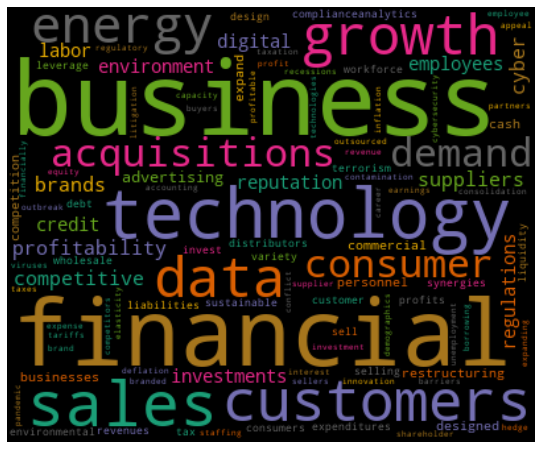

In [72]:
# adapted from: https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
    wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()
    
# Transposing document term matrix
df_hsy_T=df_hsy.loc[:, df_hsy.columns != 'Ticker_year'].transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_hsy_T.columns):
    generate_wordcloud(df_hsy_T[product].sort_values(ascending=False),product)

AttributeError: 'int' object has no attribute 'expandtabs'

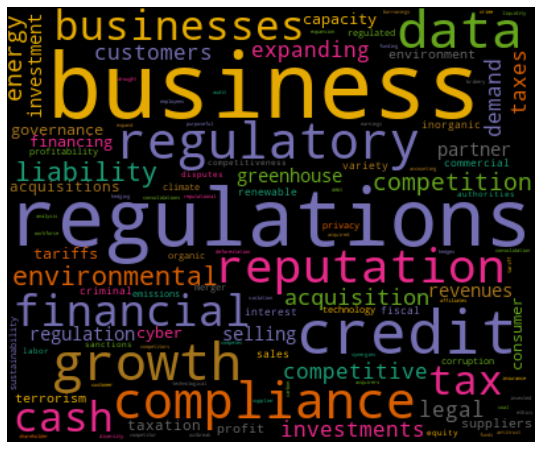

In [69]:
# adapted from: https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
    wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()
    
# Transposing document term matrix
df_adm_T=df_adm.loc[:, df_adm.columns != 'Ticker_year'].transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_adm_T.columns):
    generate_wordcloud(df_adm_T[product].sort_values(ascending=False),product)

Generate bar chart to display the most common terms for all of the annual reports

<function matplotlib.pyplot.show(close=None, block=None)>

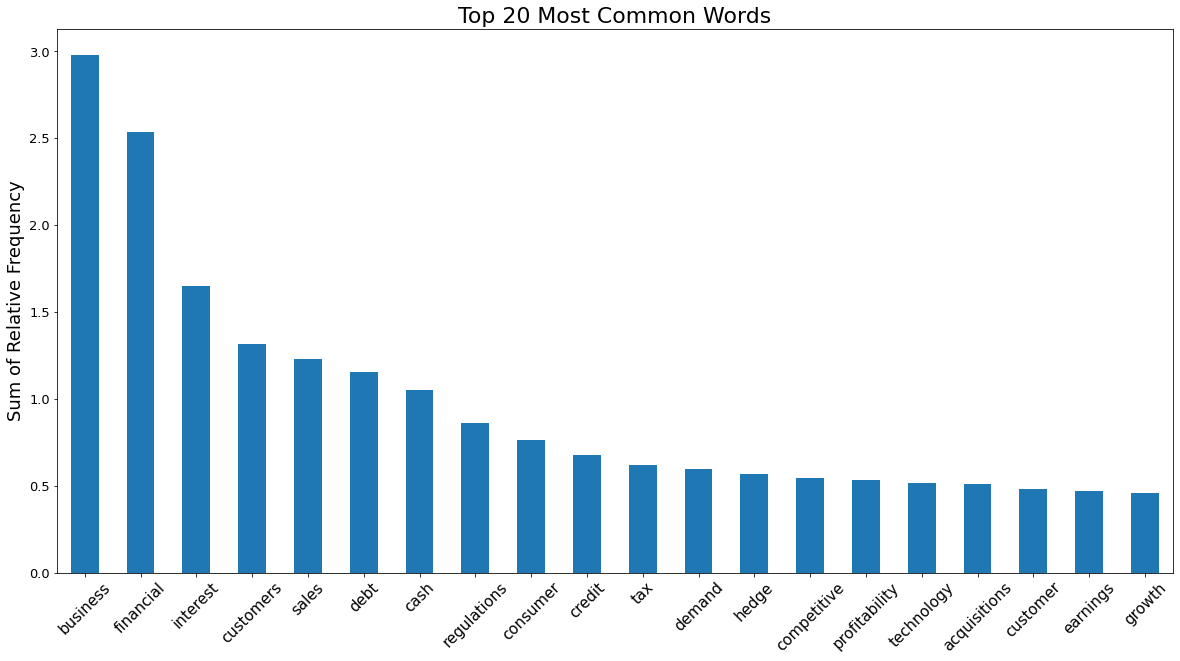

In [78]:
df_plt = df.loc[:, df.columns != 'Ticker_year']

df_plt.sum().sort_values(ascending=False).nlargest(20).plot(kind="bar", figsize=(20,10), rot=45)
plt.ylabel('Sum of Relative Frequency', size=18)
plt.title('Top 20 Most Common Words', size=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)

plt.show